<h1 style="color: blue">Mid Term: <span style="color:hotpink">Nguyễn Hoàng Long</span></h1>
<hr/>

### 1. Topic 1:

Description:

Assume a product has info with 5 properties (weight (gram), width (cm), height (cm), color, price (USD)). 
(Color :1 (Red), 2 (Blue), 3 (Green), 4 (Yellow), 5(White), 7(Purple), 8(Black), 9(Magenta), 10(Cyan))

A. Please input two vectors representing information of two products: A and B.  And calculate the dot product of two vectors, the angle between two vectors 
<hr/>

In [3]:
# import library
import numpy as np
import math

In [4]:
# wrire function to caculate product of 2 vector
def product(list_item = 5): # because Topic mentioned 5 properties,
    list_item = ['weight', 'width', 'height', 'color', 'price']
    list_color = {1:'Red',2:'Blue',3:'Green',4:'Yellow',5:'White',7:'Purple',8:'Black', 9:'Magenta', 10:'Cyan'}
    lst = []
    dict_info = {}
    for idx, item in enumerate(list_item):
        if idx !=  3:
          input_data = float(input(f'Please input of {item} '))
        else:
          input_data = int(input(f'Please input color 1 (Red), 2 (Blue), 3 (Green), 4 (Yellow), 5(White), 7(Purple), 8(Black), 9(Magenta), 10(Cyan) '))
        dict_info[item] = input_data
        lst.append(input_data)
    return dict_info, lst




In [5]:
11product_1 = product()
print(f'Info of product 1 {product_1}[0]')
print(f'The vector product 1: {product_1[1]}')
product_2 = product()
print('--'*30)
print(f'Info of product 2 {product_2[0]}')
print(f'The vector product 2: {product_2[1]}')

Please input of weight 12
Please input of width 4
Please input of height 21
Please input color 1 (Red), 2 (Blue), 3 (Green), 4 (Yellow), 5(White), 7(Purple), 8(Black), 9(Magenta), 10(Cyan) 1
Please input of price 100
Info of product 1 ({'weight': 12.0, 'width': 4.0, 'height': 21.0, 'color': 1, 'price': 100.0}, [12.0, 4.0, 21.0, 1, 100.0])[0]
The vector product 1: [12.0, 4.0, 21.0, 1, 100.0]
Please input of weight 16
Please input of width 14
Please input of height 6
Please input color 1 (Red), 2 (Blue), 3 (Green), 4 (Yellow), 5(White), 7(Purple), 8(Black), 9(Magenta), 10(Cyan) 6
Please input of price 20000
------------------------------------------------------------
Info of product 2 {'weight': 16.0, 'width': 14.0, 'height': 6.0, 'color': 6, 'price': 20000.0}
The vector product 2: [16.0, 14.0, 6.0, 6, 20000.0]


In [6]:
# get value of lst vector in def 
product_1 = product_1[1]
product_2 = product_2[1]

product_1 = np.array(product_1)
product_2 = np.array(product_2)

dot = np.dot(product_1, product_2)

norm_1 = np.linalg.norm(product_1)
norm_2 = np.linalg.norm(product_2)

cos = dot / (norm_1 * norm_2)

angle = math.degrees(cos)
angle_1 = round(angle,2)

print(f"Dot Product of two vectors product_1 {product_1} and product_2 {product_2} is {dot}")
print(f"Angle between two vectors product_1 {product_1} and product_2 {product_2} is {angle_1}")

Dot Product of two vectors product_1 [ 12.   4.  21.   1. 100.] and product_2 [1.6e+01 1.4e+01 6.0e+00 6.0e+00 2.0e+04] is 2000380.0
Angle between two vectors product_1 [ 12.   4.  21.   1. 100.] and product_2 [1.6e+01 1.4e+01 6.0e+00 6.0e+00 2.0e+04] is 55.66


B. Create a random of 200 products and apply PCA to help reduce the dimensions of data from 5 to 4,3, and 2. Print out step by step of PCA with mean, covariance, eigenvalue, eigenvector and product vectors (after reduction)

In [10]:
import pandas as pd
from random import seed
from random import randint

# products = pd.DataFrame(columns=['weight','width','height','color','price'])
def product(num_ = 200):  
    products = pd.DataFrame(columns=['weight','width','height','color','price'])
    #create a seed to random state number
    seed(42)
    for i in range(0,num_):
        weigth = randint(1,20)
        width = randint(2,20)
        height = randint(2,20)
        color = randint(1,10)
        price = randint(1,20)
        products.loc[len(products)] = [weigth, width, height, color, price]
    
    products.to_csv("product.csv", index=False)
product()

In [11]:
# mean Centering the data
import pandas as pd
data = pd.read_csv("product.csv", index_col=False)
data.shape
df = data
X = np.array(df)
print(df.sample(10))

     weight  width  height  color  price
129      12      7       5      3     10
75       19     19       6      7      5
151       6      8       8      8      9
47        5     15       7      5     15
79       14      2       7      6     14
24       20     16      18      5     18
3         8     18       2      9      7
4        18     15       9      8     19
154       1     19       6      5      2
110      10      9      10      6     11


In [12]:
def PCA(X , num_components):
    # 1. Find mean
    X_meaned = X - np.mean(X , axis = 0)
    print(f'Means = {X_meaned[:3]}')
    print('--'*30)

    # 2. Calculate the Covariance Matrix
    cov_mat = np.cov(X_meaned , rowvar = False)
    print(f'Cov = {cov_mat}')
    print('--'*30)
    # 3. Calculating Eigenvalues and Eigenvectors of the covariance matrix
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    print(f'EigenValue = {eigen_values}')
    print(f'EigenVector = {eigen_vectors}')
    print('--'*30)

    # 4. Sort the eigenvalues in descending order
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    print(f'{sorted_eigenvectors}')
    print('--'*30)

    # 5. Select the first n eigenvectors, n is desired dimension of our final reduced data.
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]

    # 6. Transform the data 
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
    print(f'List of random 200 products have 3 properties are : {X_reduced}')
    print('--'*30)

X_reduced = PCA(X , num_components = 3)

Means = [[-6.675 -9.18  -1.095 -1.385 -2.59 ]
 [-5.675 -6.18   7.905 -3.385  8.41 ]
 [ 3.325 -8.18  -9.095 -3.385 -3.59 ]]
------------------------------------------------------------
cov = [[32.7330402  -2.43366834  1.20690955  0.45741206  1.72537688]
 [-2.43366834 29.19356784 -0.30361809 -0.80834171  1.01889447]
 [ 1.20690955 -0.30361809 27.90550251 -0.07193467 -0.32768844]
 [ 0.45741206 -0.80834171 -0.07193467  8.00680905  0.22396985]
 [ 1.72537688  1.01889447 -0.32768844  0.22396985 33.48934673]]
------------------------------------------------------------
EigenValue = [ 7.96793015 27.14651942 27.98336984 33.13661623 35.0938307 ]
EigenVector = [[ 0.01442446 -0.46561867  0.16971428  0.46728133  0.73200848]
 [-0.03690917 -0.58157294  0.61679869 -0.49014508 -0.19931835]
 [-0.00488894  0.61767716  0.75858124  0.18068682  0.10177326]
 [-0.99916016  0.01405585 -0.02516236  0.01739938  0.02335631]
 [ 0.00920398  0.25149459 -0.12115197 -0.71306065  0.6430649 ]]
----------------------------

2. Topic 2:

Description:

Assume the loss function of an AI algorithm is y = x^3 - 2*x^2 + 1.  
A. Plot the function in-plane and its derivative 
<hr/>

In [13]:
# import library
import matplotlib.pyplot as plt
from scipy.misc import derivative

In [32]:
def function(x):
    return x**3 - 2*x*x + 1
# calculating its derivative
def deriv(x):
    return derivative(function, x)

# create an random array from -1 to 5 with 100    
y = np.linspace(-1, 5,100)
y

array([-1.        , -0.93939394, -0.87878788, -0.81818182, -0.75757576,
       -0.6969697 , -0.63636364, -0.57575758, -0.51515152, -0.45454545,
       -0.39393939, -0.33333333, -0.27272727, -0.21212121, -0.15151515,
       -0.09090909, -0.03030303,  0.03030303,  0.09090909,  0.15151515,
        0.21212121,  0.27272727,  0.33333333,  0.39393939,  0.45454545,
        0.51515152,  0.57575758,  0.63636364,  0.6969697 ,  0.75757576,
        0.81818182,  0.87878788,  0.93939394,  1.        ,  1.06060606,
        1.12121212,  1.18181818,  1.24242424,  1.3030303 ,  1.36363636,
        1.42424242,  1.48484848,  1.54545455,  1.60606061,  1.66666667,
        1.72727273,  1.78787879,  1.84848485,  1.90909091,  1.96969697,
        2.03030303,  2.09090909,  2.15151515,  2.21212121,  2.27272727,
        2.33333333,  2.39393939,  2.45454545,  2.51515152,  2.57575758,
        2.63636364,  2.6969697 ,  2.75757576,  2.81818182,  2.87878788,
        2.93939394,  3.        ,  3.06060606,  3.12121212,  3.18

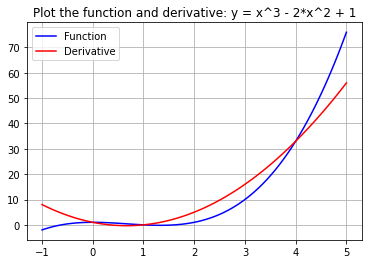

In [33]:
# plotting the function
plt.plot(y, function(y), color='blue', label='Function')
  
# plotting its derivative
plt.plot(y, deriv(y), color='red', label='Derivative')
  
# formatting
plt.legend(loc='upper left')
plt.title('Plot the function and derivative: y = x^3 - 2*x^2 + 1')
plt.grid(True)

In [34]:
# print result y when fucntion and derivative both increase
print(function(1.605))

-0.01752987500000014


B. Using the Gradient Descent to find the x to make this function get the minimum loss. 

In [35]:
new_x = 1.605 #start point
prev_x = 0 #temporary value

step_multiplier = 0.1 #learning rate 
prec = 0.000001

x_list = [new_x]
slope_list = [deriv(new_x)]

for i in range(1000):
    
    prev_x = new_x #start with random value
    
    gradient = deriv(prev_x) #calculating the error
    new_x = prev_x - step_multiplier * gradient
    
    step_size = abs(new_x - prev_x)
    
    x_list.append(new_x)
    slope_list.append(deriv(new_x))
    
    if step_size < prec:
        print('Time to repeat: ' + str(i))
        break

print('Local minimum occurs : ' + str(new_x))
print('Derivative value at this point: ' + str(deriv(new_x)))
print('f(x) or cost at this point ' + str(function(new_x)))

Time to repeat: 49
Local minimum occurs : 1.0000038075296416
Derivative value at this point: 7.615102775415661e-06
f(x) or cost at this point -3.8075151442829025e-06


In [45]:
values = np.array(x_list)
function(values)

array([-1.75298750e-02, -1.81778029e-01, -1.74076363e-01, -1.44974384e-01,
       -1.16613143e-01, -9.28126557e-02, -7.36520453e-02, -5.84334768e-02,
       -4.63938366e-02, -3.68728036e-02, -2.93362983e-02, -2.33623945e-02,
       -1.86203215e-02, -1.48511028e-02, -1.18516966e-02, -9.46254239e-03,
       -7.55792691e-03, -6.03856119e-03, -4.82585388e-03, -3.85747851e-03,
       -3.08392801e-03, -2.46582540e-03, -1.97181646e-03, -1.57691261e-03,
       -1.26118388e-03, -1.00872541e-03, -8.06838374e-04, -6.45379818e-04,
       -5.16245674e-04, -4.12959295e-04, -3.30343595e-04, -2.64259616e-04,
       -2.11397925e-04, -1.69112088e-04, -1.35285669e-04, -1.08225974e-04,
       -8.65791403e-05, -6.92622631e-05, -5.54091390e-05, -4.43268815e-05,
       -3.54612301e-05, -2.83688081e-05, -2.26949338e-05, -1.81558749e-05,
       -1.45246538e-05, -1.16196935e-05, -9.29573591e-06, -7.43657663e-06,
       -5.94925356e-06, -4.75939789e-06, -3.80751514e-06])

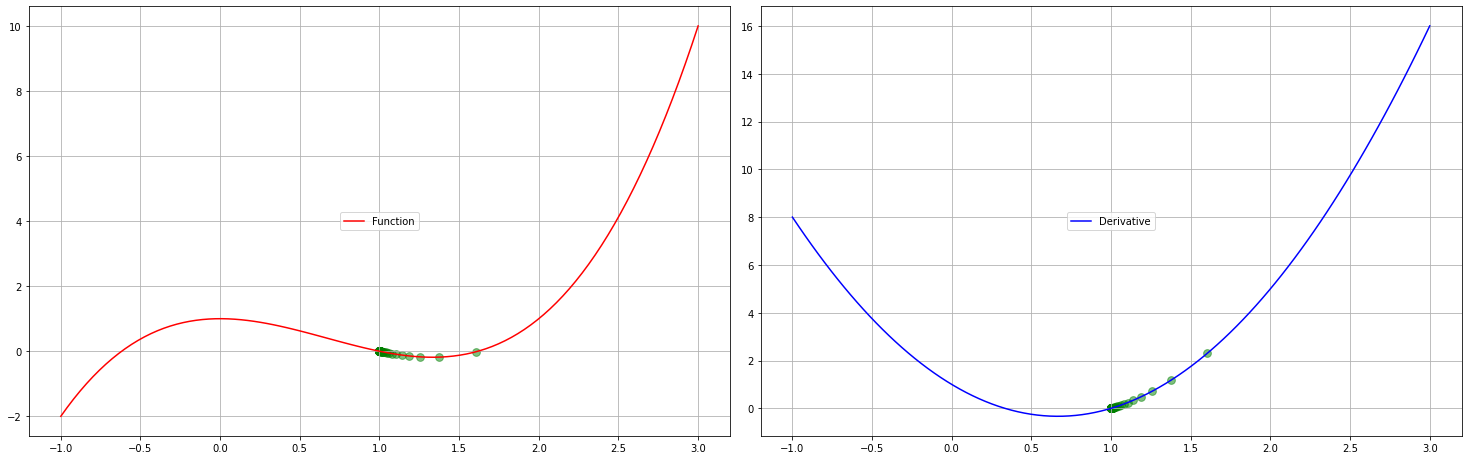

In [51]:
plt.rcParams["figure.figsize"] = [20.50, 6.50]
plt.rcParams["figure.autolayout"] = True

x = np.linspace(-1, 3, 100)
#Plot f(x)
plt.subplot(1, 2, 1)
plt.plot(x, function(x), color='red', label = 'Function')
values = np.array(x_list)
plt.scatter(x_list, function(values), color='green', s = 60, alpha =0.5)
plt.legend(loc="center")
plt.grid(True)
#Plot f'(x)
plt.subplot(1, 2, 2)
plt.plot(x, deriv(x), color='blue', label = 'Derivative')
plt.scatter(x_list, slope_list, color='green', s = 60, alpha =0.5)
plt.legend(loc="center")
plt.grid(True)
plt.show()